<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/11_Course_2_Part_8_Lesson_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
-O /tmp/rps.zip

!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
-O /tmp/rps-test-set.zip

--2021-01-05 08:07:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   169MB/s    in 1.1s    

2021-01-05 08:07:39 (169 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-01-05 08:07:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.2.112, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/t

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images : ', len(os.listdir(rock_dir)))
print('total training paper images : ', len(os.listdir(paper_dir)))
print('total training scissors images : ', len(os.listdir(scissors_dir)))

print(os.listdir(rock_dir)[:10])
print(os.listdir(paper_dir)[:10])
print(os.listdir(scissors_dir)[:10])

total training rock images :  840
total training paper images :  840
total training scissors images :  840
['rock07-k03-095.png', 'rock04-041.png', 'rock06ck02-088.png', 'rock07-k03-040.png', 'rock03-042.png', 'rock07-k03-022.png', 'rock03-078.png', 'rock05ck01-098.png', 'rock03-048.png', 'rock02-046.png']
['paper01-077.png', 'paper05-096.png', 'paper07-115.png', 'paper06-019.png', 'paper05-058.png', 'paper01-025.png', 'paper04-097.png', 'paper04-109.png', 'paper03-102.png', 'paper03-010.png']
['scissors03-066.png', 'testscissors01-041.png', 'scissors02-039.png', 'scissors04-031.png', 'testscissors02-119.png', 'scissors02-084.png', 'scissors04-038.png', 'scissors02-000.png', 'scissors01-008.png', 'testscissors01-065.png']


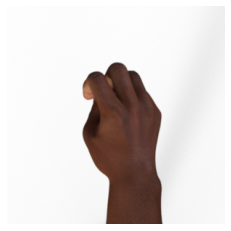

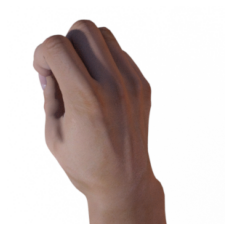

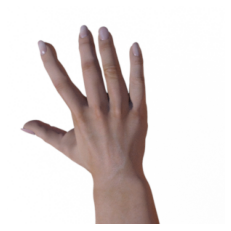

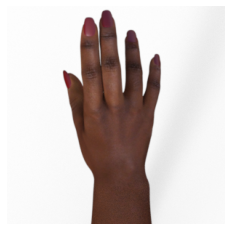

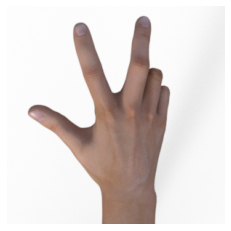

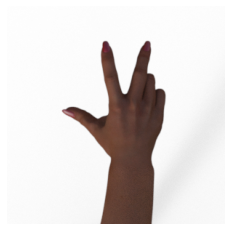

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in os.listdir(rock_dir)[pic_index-2 : pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in os.listdir(paper_dir)[pic_index-2 : pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in os.listdir(scissors_dir)[pic_index-2 : pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors) :
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [6]:
Training_dir = '/tmp/rps/'
Validation_dir = '/tmp/rps-test-set/'

training_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 40,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1. /255)

train_generator = training_datagen.flow_from_directory(
    Training_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 126
)
validation_generator = validation_datagen.flow_from_directory(
    Validation_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

model.compile(optimizer = RMSprop(lr = .001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
history = model.fit(train_generator,
                    epochs = 25,
                    steps_per_epoch = 20,
                    validation_data = validation_generator,
                    validation_steps = 3,
                    verbose = 1)

Epoch 1/25
20/20 [==============================] - 27s 975ms/step - loss: 2.5915 - acc: 0.3398 - val_loss: 1.0799 - val_acc: 0.3333
Epoch 2/25
20/20 [==============================] - 19s 954ms/step - loss: 1.1081 - acc: 0.3837 - val_loss: 1.0502 - val_acc: 0.5565
Epoch 3/25
20/20 [==============================] - 19s 950ms/step - loss: 1.0629 - acc: 0.4685 - val_loss: 0.9095 - val_acc: 0.6532
Epoch 4/25
20/20 [==============================] - 19s 950ms/step - loss: 0.9300 - acc: 0.5276 - val_loss: 0.6896 - val_acc: 0.6667
Epoch 5/25
20/20 [==============================] - 19s 951ms/step - loss: 0.7500 - acc: 0.6504 - val_loss: 0.5605 - val_acc: 0.6694
Epoch 6/25
20/20 [==============================] - 19s 950ms/step - loss: 0.6639 - acc: 0.7019 - val_loss: 0.8594 - val_acc: 0.5941
Epoch 7/25
20/20 [==============================] - 19s 946ms/step - loss: 0.7147 - acc: 0.6861 - val_loss: 0.2934 - val_acc: 0.8038
Epoch 8/25
20/20 [==============================] - 19s 945ms/step - 

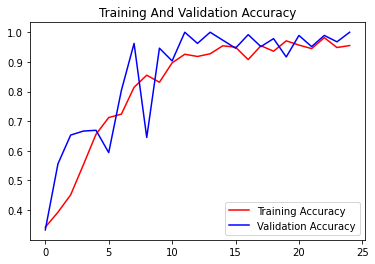

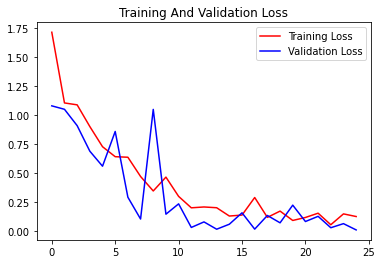

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend()
plt.title('Training And Validation Accuracy')

plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

plt.show()

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys() :
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  print(classes)

Saving avatar-2029577_640.png to avatar-2029577_640 (1).png
avatar-2029577_640.png
[[0. 0. 1.]]
